import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohitsahoo/sales-forecasting")

print("Path to dataset files:", path)

In [6]:
# 필요한 패키지 설치

import matplotlib.pyplot as plt
import pandas as pd
import datetime
plt.rcParams['figure.dpi'] = 300

In [7]:
df = pd.read_csv("C:/Users/KimDongyoung/.cache/kagglehub/datasets/rohitsahoo/sales-forecasting/versions/2/train.csv")

# 데이터 샘플 확인
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [8]:
# date 컬럼 날짜형식 변환
# 날짜 형식 변환 시 dayfirst=True 옵션 추가
df['Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, infer_datetime_format=True)
# # 날짜 오름차순 정렬
df = df.sort_values(by='Date') 
# # 연도 컬럼 생성
df['Year'] = df['Date'].dt.year # Date 컬럼에서 연도만 추출

# Date 컬럼에서 월 추출
df['Month'] = df['Date'].dt.month # Date 컬럼에서 월만 추출

# Date 컬럼에서 일 추출
df['Day'] = df['Date'].dt.day # Date 컬럼에서 일만 추출

## 선 그래프 용 데이터셋 생성
# 2018년 데이터만 필터링
df_line=df[df.Year == 2018] 

# 2018년 일 별 매출액 가공
df_line = df_line.groupby('Date')['Sales'].sum().reset_index() # Date 컬럼을 기준으로 그룹화하여 매출액 합계 계산

df_line.head()

C:\Users\KimDongyoung\AppData\Local\Temp\ipykernel_21736\783151118.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, infer_datetime_format=True)


,Date,Sales
0,2018-01-01,1481.828
1,2018-01-02,2079.554
2,2018-01-03,2070.272
3,2018-01-06,33.740
4,2018-01-07,3395.590


In [9]:
df['Date']

7980   2015-01-03
741    2015-01-04
740    2015-01-04
739    2015-01-04
1759   2015-01-05
          ...    
1297   2018-12-30
906    2018-12-30
645    2018-12-30
908    2018-12-30
5091   2018-12-30
Name: Date, Length: 9800, dtype: datetime64[ns]

<Axes: xlabel='Date'>

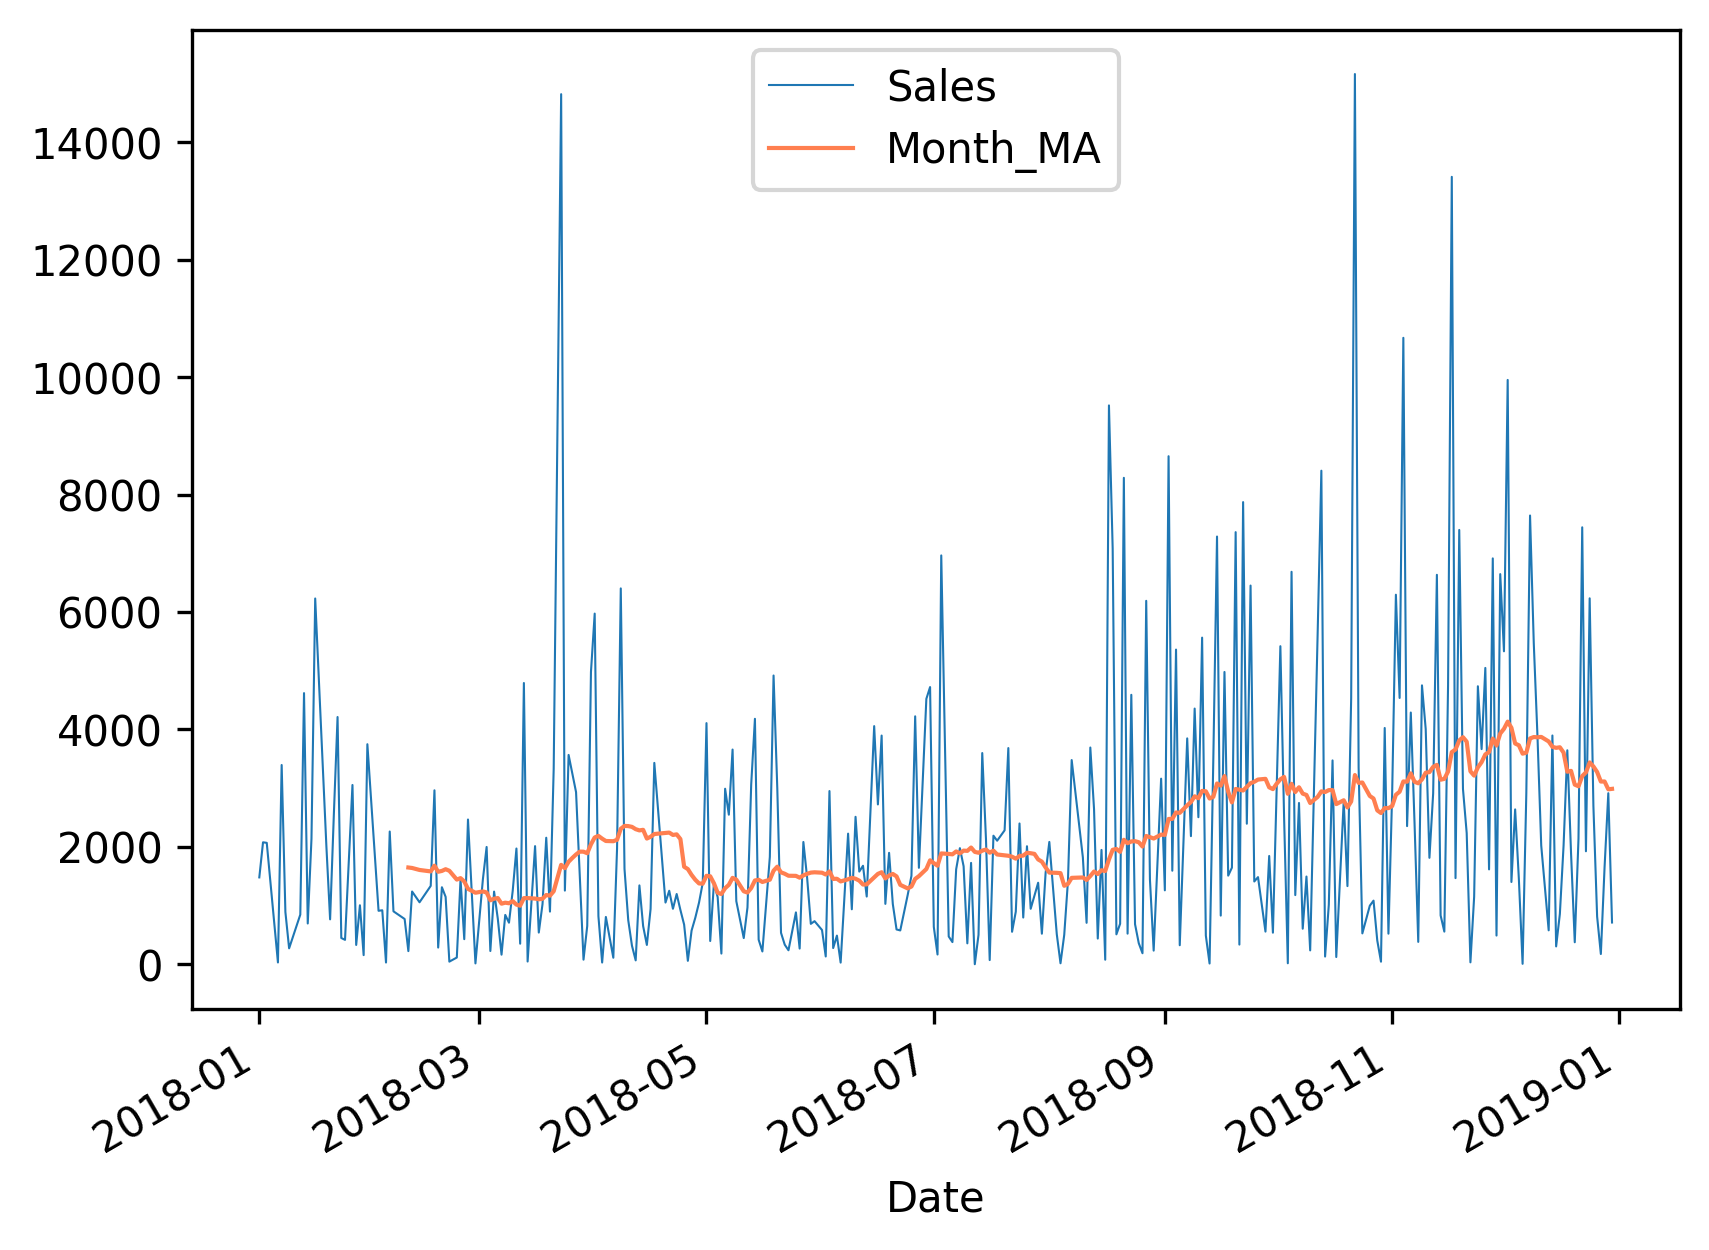

In [10]:
# 30일 이동평균 생성, Moving Averages
df_line['Month_MA'] = df_line['Sales'].rolling(window=30).mean() # 30일 이동평균 계산, 초반 30일은 NaN으로 표시됨

# 선 그래프 시각화
ax = df_line.plot(x='Date', y='Sales',linewidth = "0.5") # 일일 매출액 선 그래프, 파란색
df_line.plot(x='Date', y='Month_MA', color='#FF7F50', linewidth = "1", ax=ax) # 이동평균 선 그래프, 주황색

In [11]:
df_line

,Date,Sales,Month_MA
0,2018-01-01,1481.8280,NaN
1,2018-01-02,2079.5540,NaN
2,2018-01-03,2070.2720,NaN
3,2018-01-06,33.7400,NaN
4,2018-01-07,3395.5900,NaN
...,...,...,...
317,2018-12-26,814.5940,3276.087267
318,2018-12-27,177.6360,3113.736067
319,2018-12-28,1657.3508,3115.039293
320,2018-12-29,2915.5340,2981.792293


In [12]:
# 연도 별 판매량 데이터 가공
df_bar_1 = df.groupby('Year')['Sales'].sum().reset_index()

df_bar_1.head()

,Year,Sales
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


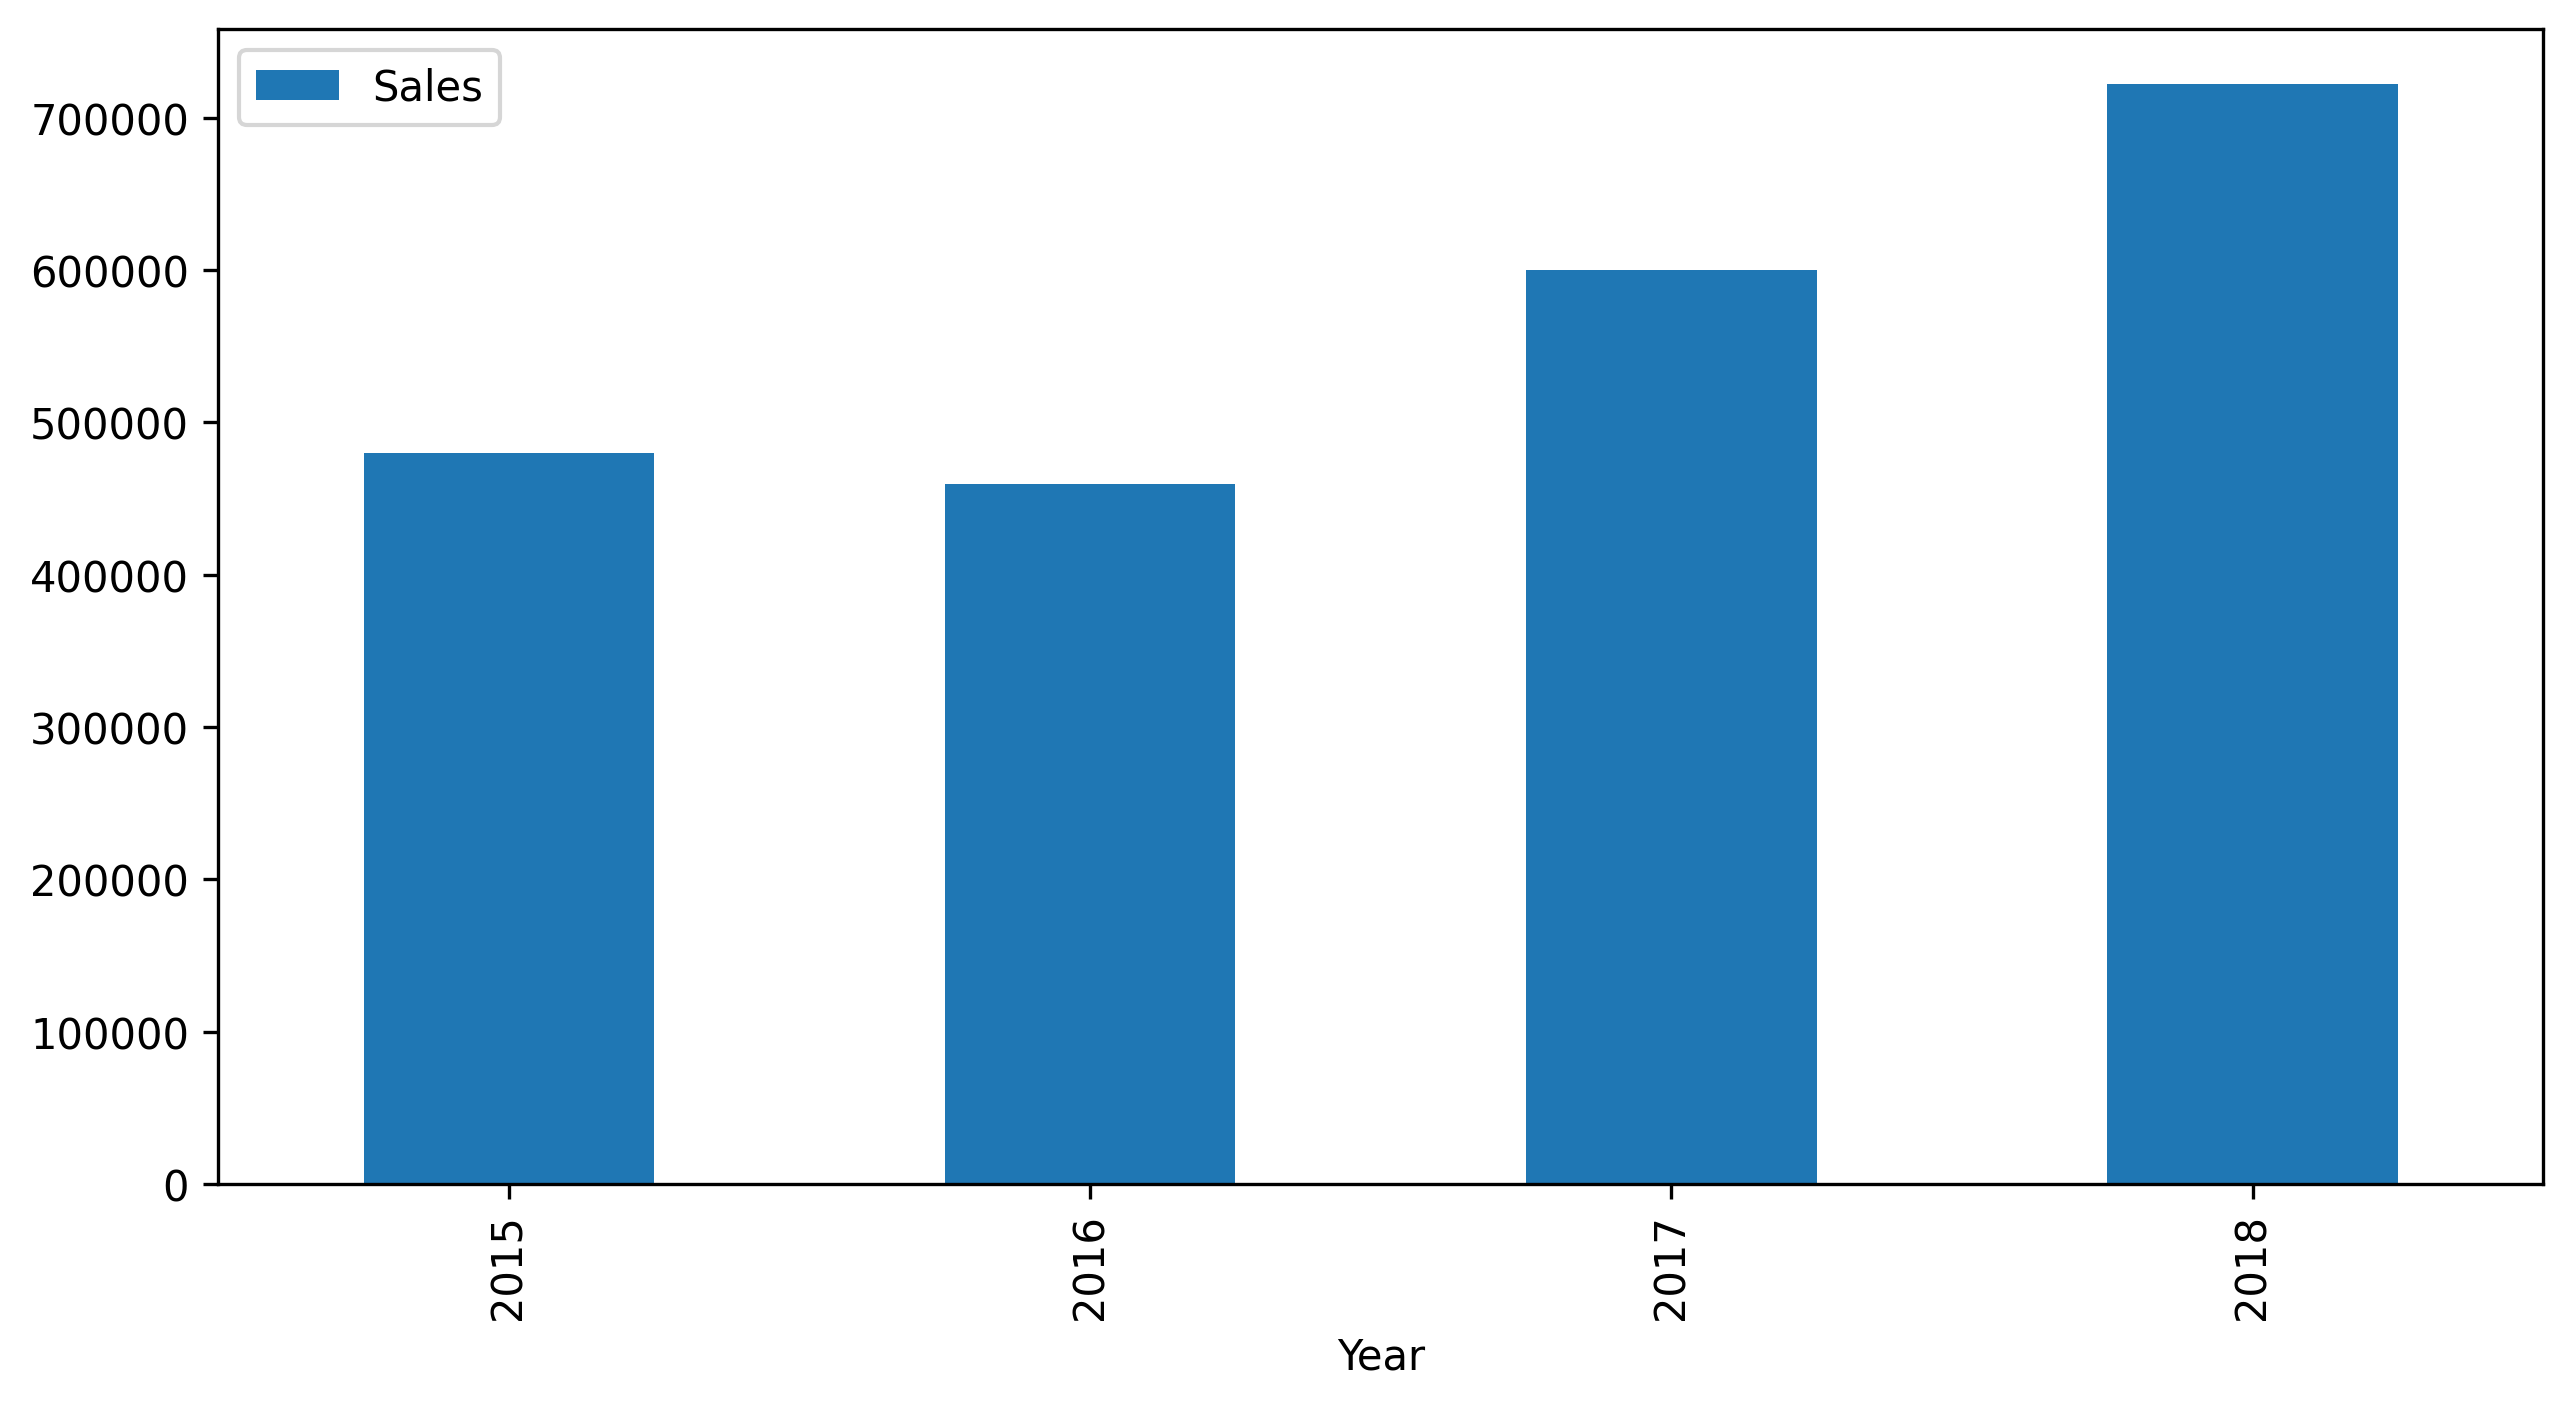

In [13]:
# 연도 별 매출액 막대 그래프 시각화
ax = df_bar_1.plot.bar(x='Year', y='Sales', rot=90, figsize=(10,5))

In [14]:
#연도별, 고객 세그먼트 별 매출액 데이터 가공
df_bar_2 = df.groupby(['Year', 'Segment'])['Sales'].sum().reset_index()

# 고객 세그먼트를 컬럼으로 피벗
df_bar_2_pv = df_bar_2.pivot(index='Year', 
                             columns='Segment', 
                             values='Sales').reset_index()

df_bar_2_pv.head()

Segment,Year,Consumer,Corporate,Home Office
0,2015,262956.8006,127797.4957,89101.9118
1,2016,265356.2933,119675.5989,74404.1132
2,2017,291142.9652,204977.3178,104072.2670
3,2018,328604.4719,236043.6624,157403.8849


<Axes: xlabel='Year'>

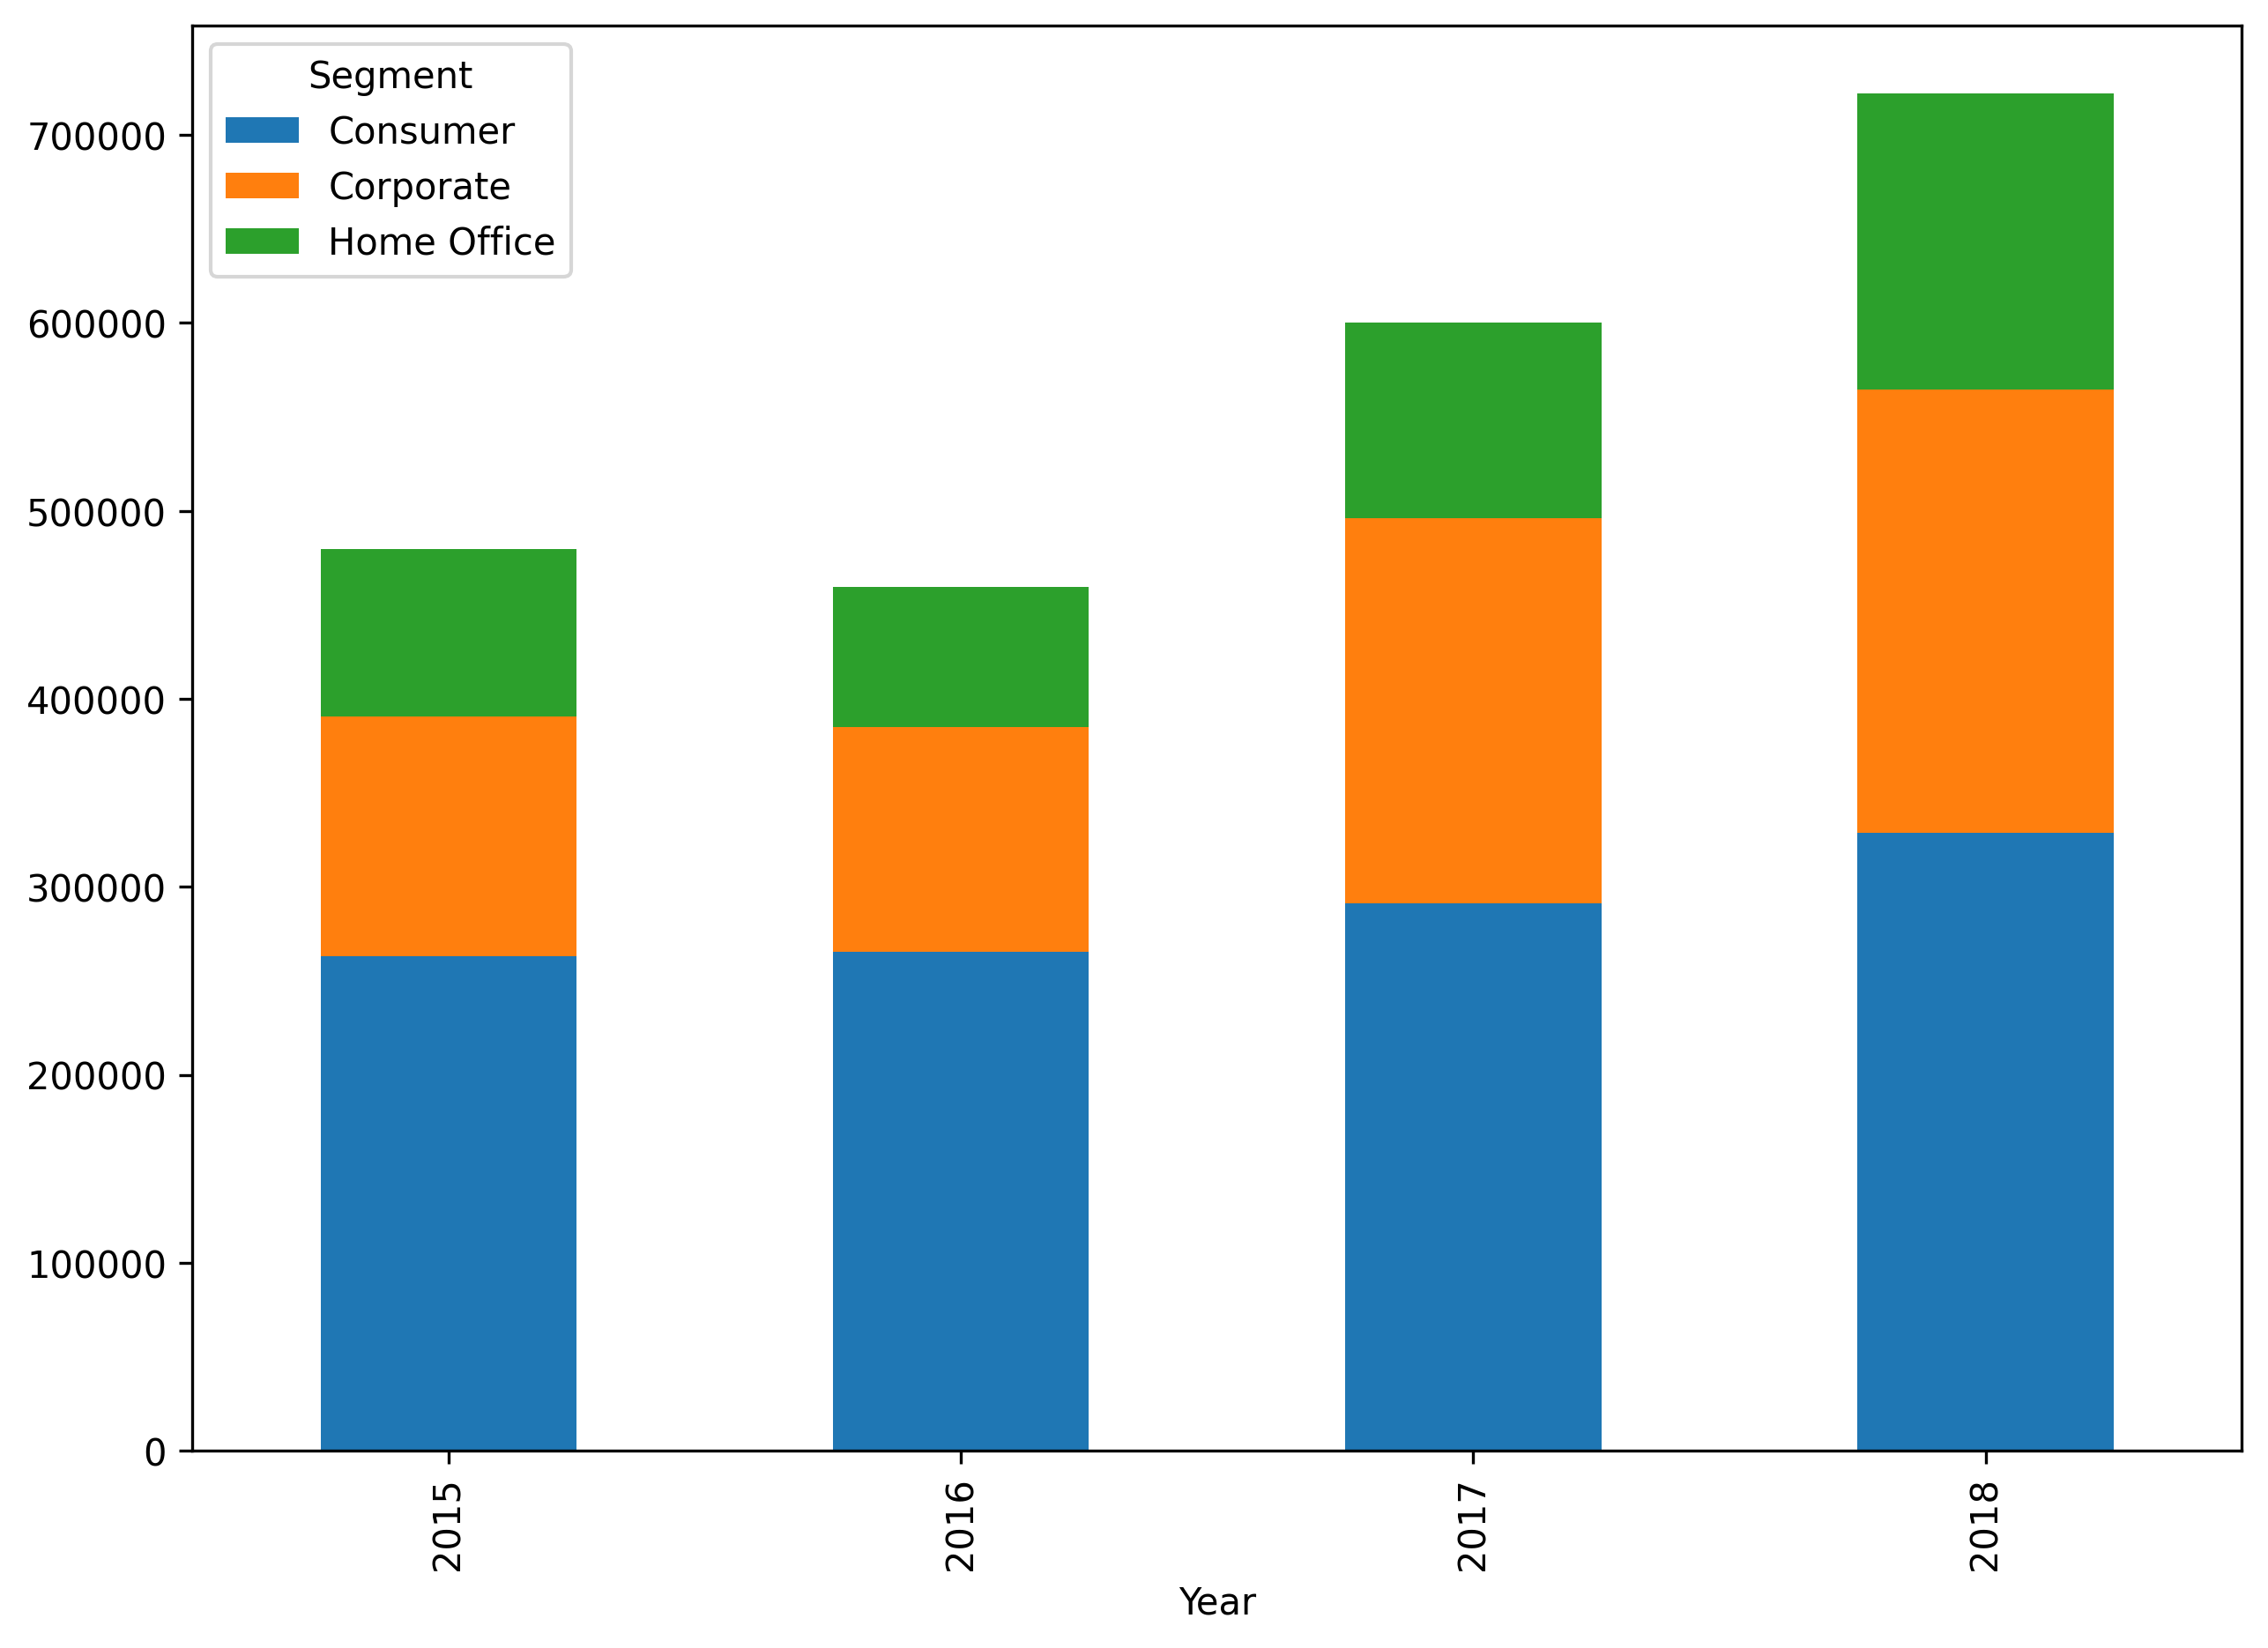

In [15]:
# 연도 별 고객 세그먼트 별 매출액 누적 막대 그래프 시각화
df_bar_2_pv.plot.bar(x='Year', stacked=True, figsize=(10,7))